In [295]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
movieDataset = pd.read_csv('movie_statistic_dataset.csv')

In [296]:
# Load data into a DataFrame
df = pd.DataFrame(movieDataset, columns=movieDataset.columns)
df.head()
#Remove production_data column
df = df.drop([
    'genres', 'production_date', 'Domestic gross $','director_name', 'director_professions',
    'Production budget $', 'director_birthYear', 'director_deathYear',
    'movie_numerOfVotes'
    ], axis=1)

df.head()


,movie_title,runtime_minutes,movie_averageRating,approval_Index,Worldwide gross $
0,Avatar: The Way of Water,192.0,7.8,7.061101,2265935552
1,Avengers: Endgame,181.0,8.4,8.489533,2794731755
2,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,6.272064,1045713802
3,Avengers: Age of Ultron,141.0,7.3,7.214013,1395316979
4,Avengers: Infinity War,149.0,8.4,8.460958,2048359754


In [297]:
df

,movie_title,runtime_minutes,movie_averageRating,approval_Index,Worldwide gross $
0,Avatar: The Way of Water,192.0,7.8,7.061101,2265935552
1,Avengers: Endgame,181.0,8.4,8.489533,2794731755
2,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,6.272064,1045713802
3,Avengers: Age of Ultron,141.0,7.3,7.214013,1395316979
4,Avengers: Infinity War,149.0,8.4,8.460958,2048359754
...,...,...,...,...,...
4375,Super Size Me,100.0,7.2,6.017902,22233808
4376,The Brothers McMullen,98.0,6.6,4.231464,10426506
4377,Gabriela,93.0,4.9,2.526405,2335352
4378,Tiny Furniture,98.0,6.2,4.242085,424149


In [298]:
# Creating X and y
X = df[['runtime_minutes', 'approval_Index', 'Worldwide gross $']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df['movie_averageRating']
# Convert DataFrame into np array
y = np.asarray(y)

In [299]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.50
)

In [300]:
scaler = StandardScaler()

In [301]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [302]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

# Model 1: Simple model, few neurons, no normalization and few layers
model1 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(3,)),
    keras.layers.Dense(3),
])


In [303]:

# Model 2: Batch Normalization, 3 layers, 32, 12, 5 nodes respectively, relu activation
model2 = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(3,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5),
])

In [304]:


# Model 3: Batch Normalization, more neurons and layers, tanh activation
model3 = keras.Sequential([
    keras.layers.Dense(32, activation='tanh', input_shape=(3,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(3)
])

In [305]:
model1.compile(optimizer='adam', loss='mean_squared_error')
model2.compile(optimizer='adam', loss='mean_squared_error')
model3.compile(optimizer='adam', loss='mean_squared_error')


In [306]:
history1 = model1.fit(X_train_scaled, y_train, epochs=50, batch_size=25, validation_split=0.1)


Epoch 1/50
79/79 [==============================] - 1s 4ms/step - loss: 36.3426 - val_loss: 31.3957
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 26.4530 - val_loss: 20.1514
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 15.2978 - val_loss: 10.0166
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 7.1751 - val_loss: 4.2778
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 3.2686 - val_loss: 1.9773
Epoch 6/50
79/79 [==============================] - 0s 1ms/step - loss: 1.7922 - val_loss: 1.2527
Epoch 7/50
79/79 [==============================] - 0s 1ms/step - loss: 1.2348 - val_loss: 0.9735
Epoch 8/50
79/79 [==============================] - 0s 2ms/step - loss: 0.9741 - val_loss: 0.8154
Epoch 9/50
79/79 [==============================] - 0s 2ms/step - loss: 0.8057 - val_loss: 0.7014
Epoch 10/50
79/79 [==============================] - 0s 2ms/step - loss: 0.6891 - val_loss: 0.6223
Epoch 11/50
7

In [307]:
history2 = model2.fit(X_train_scaled, y_train, epochs=50, batch_size=25, validation_split=0.1)


Epoch 1/50
79/79 [==============================] - 1s 4ms/step - loss: 40.6178 - val_loss: 37.7782
Epoch 2/50
79/79 [==============================] - 0s 3ms/step - loss: 35.5886 - val_loss: 31.4223
Epoch 3/50
79/79 [==============================] - 0s 3ms/step - loss: 27.8672 - val_loss: 22.6150
Epoch 4/50
79/79 [==============================] - 0s 2ms/step - loss: 18.6801 - val_loss: 14.0100
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 10.4532 - val_loss: 6.3372
Epoch 6/50
79/79 [==============================] - 0s 3ms/step - loss: 4.8898 - val_loss: 2.6557
Epoch 7/50
79/79 [==============================] - 0s 3ms/step - loss: 2.0277 - val_loss: 1.0310
Epoch 8/50
79/79 [==============================] - 0s 2ms/step - loss: 0.9449 - val_loss: 0.5169
Epoch 9/50
79/79 [==============================] - 0s 3ms/step - loss: 0.5595 - val_loss: 0.3460
Epoch 10/50
79/79 [==============================] - 0s 4ms/step - loss: 0.4323 - val_loss: 0.3448
Epoch 11/5

In [308]:
history3 = model3.fit(X_train_scaled, y_train, epochs=50, batch_size=25, validation_split=0.1)


Epoch 1/50
79/79 [==============================] - 2s 6ms/step - loss: 39.3098 - val_loss: 38.5303
Epoch 2/50
79/79 [==============================] - 0s 3ms/step - loss: 30.0785 - val_loss: 27.0752
Epoch 3/50
79/79 [==============================] - 0s 3ms/step - loss: 16.0661 - val_loss: 10.7127
Epoch 4/50
79/79 [==============================] - 0s 3ms/step - loss: 5.2569 - val_loss: 2.4383
Epoch 5/50
79/79 [==============================] - 0s 3ms/step - loss: 1.2165 - val_loss: 0.6821
Epoch 6/50
79/79 [==============================] - 0s 3ms/step - loss: 0.4767 - val_loss: 0.3755
Epoch 7/50
79/79 [==============================] - 0s 4ms/step - loss: 0.4107 - val_loss: 0.3961
Epoch 8/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3924 - val_loss: 0.3200
Epoch 9/50
79/79 [==============================] - 0s 4ms/step - loss: 0.3962 - val_loss: 0.3457
Epoch 10/50
79/79 [==============================] - 0s 3ms/step - loss: 0.3842 - val_loss: 0.3169
Epoch 11/50
7

In [309]:
# Evaluar el modelo en el conjunto de prueba

#Model 1
mse = model1.evaluate(X_test_scaled, y_test)
print(f'MSE en el conjunto de prueba Modelo 1: {mse}')

#Model 2
mse = model2.evaluate(X_test_scaled, y_test)
print(f'MSE en el conjunto de prueba Modelo 2: {mse}')

#Model 3
mse = model3.evaluate(X_test_scaled, y_test)
print(f'MSE en el conjunto de prueba Modelo 3: {mse}')

69/69 [==============================] - 0s 1ms/step - loss: 0.2414
MSE en el conjunto de prueba Modelo 1: 0.2413509339094162
69/69 [==============================] - 0s 2ms/step - loss: 0.2326
MSE en el conjunto de prueba Modelo 2: 0.2326054573059082
69/69 [==============================] - 0s 2ms/step - loss: 0.2600
MSE en el conjunto de prueba Modelo 3: 0.26003172993659973


In [310]:
#Model 1
train_mse1 = history1.history['loss']
val_mse1 = history1.history['val_loss']

#Model 2
train_mse2 = history2.history['loss']
val_mse2 = history2.history['val_loss']


#Model 3
train_mse3 = history3.history['loss']
val_mse3 = history3.history['val_loss']


In [311]:
# Epochs model 1
epochs1 = np.arange(1, len(train_mse1)+1)

# Epochs model 2
epochs2 = np.arange(1, len(train_mse2)+1)

# Epochs model 3
epochs3 = np.arange(1, len(train_mse3)+1)

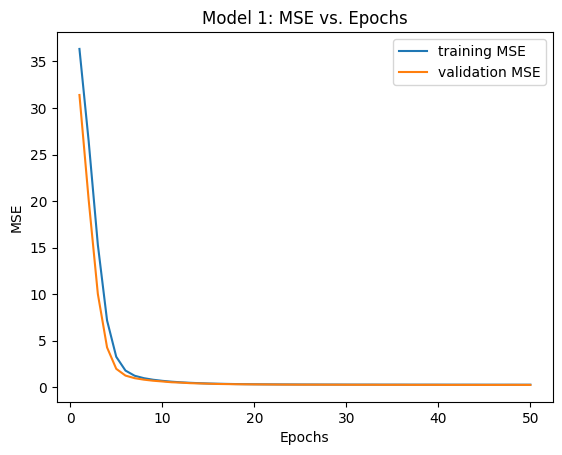

In [312]:
#Model 1
plt.plot(epochs1, train_mse1, label='training MSE')
plt.plot(epochs1, val_mse1, label='validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model 1: MSE vs. Epochs')
plt.legend()
plt.show()

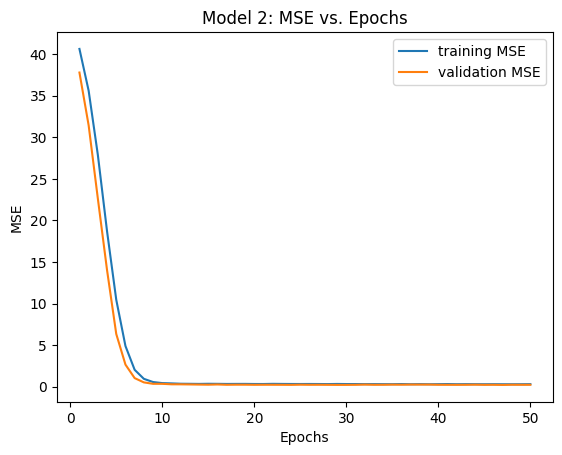

In [313]:
# Model 2
plt.plot(epochs2, train_mse2, label='training MSE')
plt.plot(epochs2, val_mse2, label='validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model 2: MSE vs. Epochs')
plt.legend()
plt.show()

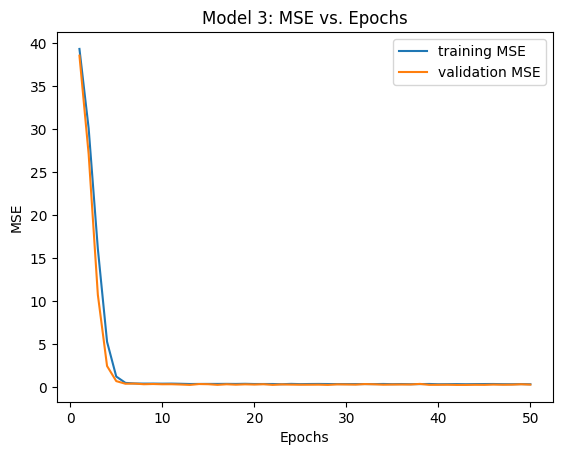

In [314]:
# Model 3
plt.plot(epochs3, train_mse3, label='training MSE')
plt.plot(epochs3, val_mse3, label='validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model 3: MSE vs. Epochs')
plt.legend()
plt.show()